In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [33]:
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/brainhead.dat", sep=" ", skipinitialspace=True, header=None)

In [34]:
df.head

<bound method NDFrame.head of      0  1     2     3
0    1  1  4512  1530
1    1  1  3738  1297
2    1  1  4261  1335
3    1  1  3777  1282
4    1  1  4177  1590
..  .. ..   ...   ...
232  2  2  3214  1110
233  2  2  3394  1215
234  2  2  3233  1104
235  2  2  3352  1170
236  2  2  3391  1120

[237 rows x 4 columns]>

In [4]:
df.rename(columns={0:"gender",1:"age group",2:"head size",3:"brain weight"},inplace= True)

In [5]:
print(df)

     gender  age group  head size  brain weight
0         1          1       4512          1530
1         1          1       3738          1297
2         1          1       4261          1335
3         1          1       3777          1282
4         1          1       4177          1590
..      ...        ...        ...           ...
232       2          2       3214          1110
233       2          2       3394          1215
234       2          2       3233          1104
235       2          2       3352          1170
236       2          2       3391          1120

[237 rows x 4 columns]


In [6]:
df.describe()

,gender,age group,head size,brain weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [7]:
X=df["head size"].values
Y=df["brain weight"].values

In [8]:
#mean of X and Y
x_mean=np.mean(X)
y_mean=np.mean(Y)
#length of the tables
n=len(X)

#calculte b0 and b1 values y=b1x+b0
numer=0
deno=0
for i in range(n):
    numer= numer + ((X[i]-x_mean)*(Y[i]-y_mean))
    deno= deno + ((X[i]-x_mean)**2)
b1=numer/deno
b0=y_mean - (b1 * x_mean)
print(b1,b0)

0.26342933948939945 325.57342104944223


In [18]:
max_x=np.max(X) + 100
min_x=np.min(X) - 100

In [19]:
df['head size'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: head size, dtype: float64

In [20]:
# calculating x and y values
x=np.linspace(min_x,max_x,1000)
y= b1*x + b0

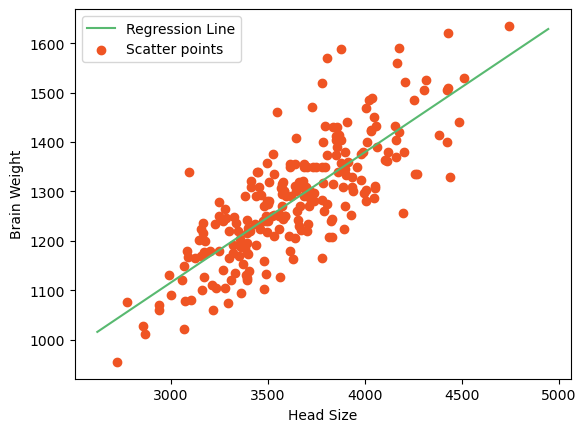

In [22]:
plt.plot(x,y,color="#58b970",label="Regression Line")
plt.scatter(X,Y,c="#ef5423",label="Scatter points")
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

In [24]:
# caluclation the R2 value
ss_n=0
ss_d=0
for i in range(n):
    y_pred= b0 + b1 * X[i]
    ss_d= ss_d + ((Y[i] - y_mean) ** 2)
    ss_n= ss_n + ((Y[i] - y_pred) ** 2)
r2= 1 - (ss_n/ss_d)
print(r2)

0.6393117199570003


In [27]:
#calculating R2 from using Sklearn module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred= reg.predict(X)
r2_score=reg.score(X,Y)

In [28]:
print(r2_score)

0.639311719957


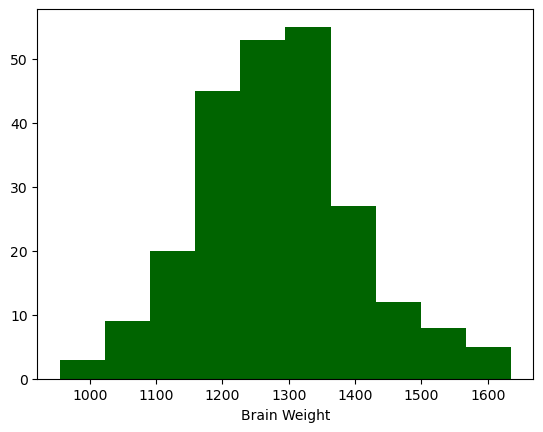

In [31]:
#it will show brain weight in histogram
plt.hist(df["brain weight"],color="darkgreen")
plt.xlabel("Brain Weight")
plt.show()